<a href="https://colab.research.google.com/github/hemanth1565/Credit-card-fraud-detaction/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('creditcard.csv')

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0


In [7]:
from sklearn.preprocessing import StandardScaler

In [25]:
data.isnull().sum()

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 1
V12                 1
V13                 1
V14                 1
V15                 1
V16                 1
V17                 1
V18                 1
V19                 1
V20                 1
V21                 1
V22                 1
V23                 1
V24                 1
V25                 1
V26                 1
V27                 1
V28                 1
Class               1
normalizedAmount    1
dtype: int64

In [8]:
data['normalizedAmount']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [9]:
data = data.drop(['Amount'],axis=1)

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.219338
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.360231
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.122791
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.116307
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.094765


In [11]:
data=data.drop(['Time'],axis=1)

In [89]:
data.dropna(inplace=True)

In [90]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.219338
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.360231
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.122791
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.116307
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.094765


In [91]:
data=data.astype("float64")

In [92]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
count,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,...,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,5.159000e+04
mean,-0.244246,0.003909,0.691983,0.183627,-0.259020,0.104731,-0.120468,0.054471,0.108469,-0.054386,...,-0.028862,-0.106634,-0.039418,0.007995,0.135556,0.020305,0.004140,0.003987,0.002908,-5.126760e-16
std,1.888007,1.641202,1.498384,1.398839,1.413493,1.312681,1.278453,1.216578,1.208875,1.138368,...,0.732046,0.636907,0.592622,0.595768,0.438858,0.500884,0.389621,0.332373,0.053844,1.000010e+00
min,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,-3.708418e-01
25%,-0.993830,-0.570282,0.215231,-0.723615,-0.871575,-0.634829,-0.606792,-0.146428,-0.622809,-0.530483,...,-0.230767,-0.528352,-0.178719,-0.322127,-0.128074,-0.330665,-0.063502,-0.006740,0.000000,-3.405479e-01
50%,-0.246980,0.075696,0.793746,0.190604,-0.290127,-0.150447,-0.077525,0.059092,-0.000435,-0.110565,...,-0.067054,-0.081866,-0.051550,0.062606,0.174933,-0.072844,0.008875,0.022241,0.000000,-2.708679e-01
75%,1.154834,0.731304,1.429405,1.067017,0.282190,0.495853,0.424982,0.333437,0.800734,0.416692,...,0.108996,0.307826,0.078873,0.401672,0.421984,0.299365,0.083277,0.076230,0.000000,-3.098172e-02
max,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,1.000000,5.055662e+01


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51590 entries, 0 to 51589
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   V1                51590 non-null  float64
 1   V2                51590 non-null  float64
 2   V3                51590 non-null  float64
 3   V4                51590 non-null  float64
 4   V5                51590 non-null  float64
 5   V6                51590 non-null  float64
 6   V7                51590 non-null  float64
 7   V8                51590 non-null  float64
 8   V9                51590 non-null  float64
 9   V10               51590 non-null  float64
 10  V11               51590 non-null  float64
 11  V12               51590 non-null  float64
 12  V13               51590 non-null  float64
 13  V14               51590 non-null  float64
 14  V15               51590 non-null  float64
 15  V16               51590 non-null  float64
 16  V17               51590 non-null  float6

In [94]:
X = data.iloc[:, data.columns != 'Class']

In [95]:
Y = data.iloc[:, data.columns == 'Class']

In [96]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.219338
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.360231
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.122791
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.116307
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.094765


In [97]:
Y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [98]:
from sklearn.model_selection import train_test_split


In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state=0)

In [100]:
X_train.shape

(36113, 29)

In [101]:
X_test.shape

(15477, 29)

In [102]:
from sklearn.ensemble import RandomForestClassifier


In [103]:
random_forest = RandomForestClassifier(n_estimators = 100)

In [104]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
43153,-1.851824,0.602179,0.739416,-1.080824,0.551174,-1.074402,0.744156,0.142937,-0.458011,-0.008957,...,-0.078255,-0.494244,-1.096640,0.472767,-0.017444,-0.030697,0.494367,0.006547,-0.132837,-0.304022
27407,-0.722572,0.045701,2.829392,1.781956,-1.142690,0.337991,0.012011,0.256171,0.757523,-0.727751,...,0.250909,0.048151,0.426680,0.188627,0.950732,-0.290688,-0.344441,0.205605,0.183420,0.056508
36290,-1.868528,-0.513733,0.404501,1.789187,-1.293343,0.307191,2.062893,0.248452,-1.086591,-0.945029,...,1.145263,0.497661,0.427482,1.036836,0.376837,0.348049,-0.160919,-0.155108,0.027442,1.719755
12281,1.128508,-0.370899,1.116497,-0.629930,-1.008673,-0.097555,-0.833568,0.161294,2.841575,-1.328339,...,-0.180034,-0.064636,0.279133,0.009825,0.185168,0.339946,-0.726389,0.077200,0.019046,-0.324099
6828,1.406112,-1.057543,1.119770,-1.155549,-1.835715,-0.486776,-1.447877,-0.104402,-0.603528,1.195267,...,-0.287322,-0.072917,0.420016,-0.029517,0.491736,0.301683,-0.119076,0.025785,0.017133,-0.252546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,0.415683,...,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,1.588561
45891,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,-0.399419,...,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,0.059585
42613,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,-1.323822,...,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,0.942684
43567,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,0.015851,...,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,0.003493


In [105]:
Y_train

,Class
43153,0.0
27407,0.0
36290,0.0
12281,0.0
6828,0.0
...,...
21243,0.0
45891,0.0
42613,0.0
43567,0.0


In [106]:
random_forest.fit(X_train,Y_train.values.ravel())

RandomForestClassifier()

In [107]:
y_pred= random_forest.predict(X_test)

In [108]:
random_forest.score(X_test,Y_test)

0.9992892679459844

In [109]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.YlOrBr):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=10, color='red',fontweight='bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    
    fmt ='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                horizontalalignment="right", verticalalignment = "bottom",fontweight='bold',
                color="black" if cm[i, j] > thresh else "black")
        
    plt.ylabel=('True label')
    plt.xlabel=('Predicted label')
    plt.tight_layout()

In [110]:
cnf_matrix= confusion_matrix(Y_test, y_pred)

Confusion matrix, without normalization
[[15429     6]
 [    5    37]]


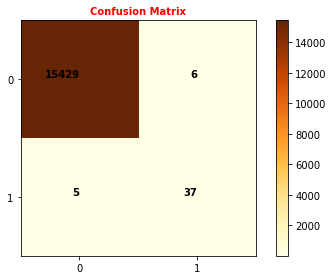

In [111]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Confusion matrix, without normalization
[[51434     6]
 [    5   145]]


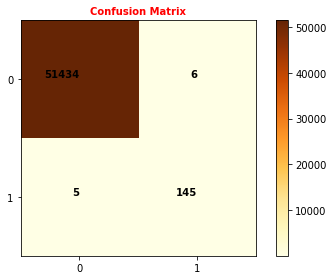

In [112]:
y_pred= random_forest.predict(X)
y_expected = pd.DataFrame(Y)
cnf_matrix= confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [113]:
plt.show()

👨‍💻**Project Completed By --->** Venkata Hemanth 